# Historical Data: Intraday

These financial data are generally provided in a format that includes the following information:  
Date  
Open Price  
High Price  
Low Price  
Closing Price  
Volume
These data—often referred to as OHLC Chart Data—can be interpreted as Time Series data and are perfect for performing technical analysis. We’ll dive into this format in just a moment but, for now, just realize this is a standard format for historical pricing data within financial markets.

## [yfinance]()

For this approach, we need to install the yfinance library as `pip install yfinance `. This library provides sample tools for working with financial data requests to the Yahoo Finance website.  
> ⚠️ periodic breakage, general quirkiness

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
tick = ['NVDA']
data = yf.download('AAPL', period='23y', auto_adjust=True)
data2 = data[32:]
data3 = data2.iloc[::-1]
data3= data3.reset_index()

[*********************100%***********************]  1 of 1 completed


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

# Alpha Vantage:
 ✌️ Providing Free 20 years of data with no missing values.  
 ⚠️ period breakage

In [43]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=full&apikey=UNO4CZQHSBZSN71N'
r = requests.get(url)
data= r.json()
timeseries = data['Time Series (Daily)']
value2 = dict()
extra = list()
index = ['open', 'high', 'low', 'close', 'volume']
for value in timeseries:
    for key in timeseries.get(value):
        extra.append(timeseries[value][key])
    value2[value]=extra
    extra = list()

    
df1 = pd.DataFrame(value2, index=index).T
df1 = df1.reset_index()
df1 = df1.rename(columns={'index':'Date', 'open':'Open', 'high':'High', 'low':'Low', 'close':'Close', 'volume':'Volume'})



#### Comparison of two datasets:
Below is the comparison of values in two different data sets provided by Y finance and Alpha Vantage of company AAPL. 

In [54]:
data3.compare(df1)

Open                  High                   Low            \
            self     other        self     other        self     other   
0     154.649994  154.6500  155.240005  155.2400  151.380005  151.3800   
1     154.789993  154.7850  157.100006  157.1000  153.610001  153.6106   
2     159.899994  159.9000  160.539993  160.5400  153.369995  153.3700   
3     159.589996  159.5900  164.259995  164.2600  159.300003  159.3000   
4     155.470001  155.4700  157.820007  157.8200  154.750000  154.7500   
...          ...       ...         ...       ...         ...       ...   
5751    0.645138   84.6200    0.673727   88.3700    0.640374   84.0000   
5752    0.625603   82.0600    0.650856   85.3700    0.614644   80.6200   
5753    0.622269   81.6200    0.634657   83.2500    0.617503   81.0000   
5754    0.594633   78.0000    0.622745   81.6900    0.589392   77.3100   
5755    0.609880   80.0000    0.615121   80.6900    0.589868   77.3700   

           Close               Volume             
            self     other       self      other  
0     152.369995  152.3700   90263300   90481110  
1     155.309998  155.3100   87965400   87965409  
2     153.839996  153.8400  122656600  122656614  
3     163.429993  163.4300  104956000  104955962  
4     157.369995  157.3700   68028800   68081006  
...          ...       ...        ...        ...  
5751    0.673250   88.3100  416808000    3721500  
5752    0.637515   83.6200  379086400    3384700  
5753    0.621316   81.5000  328462400    2932700  
5754    0.611786   80.2500  399235200    3564600  
5755    0.591774   77.6200  278577600    2487300  

[5756 rows x 10 columns]

#### Representation
These two graphs are giving the difference in values of two different datasets of same company provided by Y finance and Alpha Vantage.

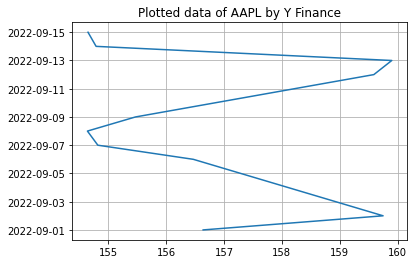

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
data4 = data3.head(10)
df2 = df1.head(10)
df2 = df2.iloc[::-1]
plt.title('Plotted data of AAPL by Y Finance')
plt.plot(data4['Open'], data4['Date'])
#plt.plot(adf2['Open'], df2['Close'])
plt.grid(True)
plt.show()


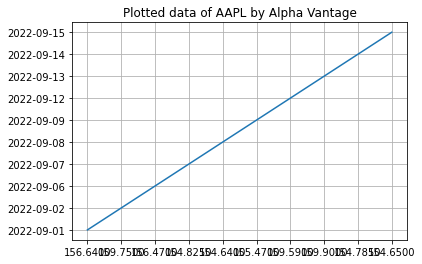

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.title('Plotted data of AAPL by Alpha Vantage')
plt.plot(df2['Open'], df2['Date'])
plt.grid(True)
plt.show()

In [20]:
data4.head(5)

,Date,Open,High,Low,Close,Volume
0,2022-09-15,154.649994,155.240005,151.380005,152.369995,90263300
1,2022-09-14,154.789993,157.100006,153.610001,155.309998,87965400
2,2022-09-13,159.899994,160.539993,153.369995,153.839996,122656600
3,2022-09-12,159.589996,164.259995,159.300003,163.429993,104956000
4,2022-09-09,155.470001,157.820007,154.750000,157.369995,68028800


## Zerodha-historical-data-download :
This contains code to download historical data for more than 2000 days and intraday data for more than 100 days.  
⚠️ Not provinding free historical data


In [ ]:
from kiteconnect import KiteConnect, KiteTicker
import pandas as pd
import datetime as dt
import numpy as np
import os
import time
import json



api_key = 'your_api_key'
api_secret = 'your_api_secret'

kite = KiteConnect(api_key)
url = kite.login_url()

request_token = 'your_request_token'
session = kite.generate_session(request_token, api_secret)
access_token = session['access_token']
kite.set_access_token(access_token)

instruments = pd.DataFrame(kite.instruments('NSE'))


def lookup(df, symbol):
    try:
        return df[df.tradingsymbol==symbol].instrument_token.values[0]
    except:
        return -1

def fetchandstoreOHLC(symbol,duration,tf):
    nodata=[]
    try:
        if not os.path.isfile(symbol+'.csv'):
            data = pd.DataFrame()
            instrument_token = lookup(instruments, symbol)  
            if duration>100:
                no_of_hundreds = duration//100
                start = 100
                end = 0
                for i in range(no_of_hundreds):
                    df = pd.DataFrame(kite.historical_data(instrument_token, from_date = dt.datetime.today()-dt.timedelta(start), 
                    to_date = dt.datetime.today()-dt.timedelta(end), interval = tf))
                    data = data.append(df)
                    start+=100
                    end+=100
                dur1 = duration%100
                df1 = pd.DataFrame(kite.historical_data(instrument_token, from_date = dt.datetime.today()-dt.timedelta(duration), 
                                      to_date = dt.datetime.today()-dt.timedelta(duration-dur1), interval = tf))
                data = data.append(df1)
            else:
                df2 = pd.DataFrame(kite.historical_data(instrument_token, from_date = dt.datetime.today()-dt.timedelta(duration), 
                                      to_date = dt.datetime.today(), interval = tf))
                data = data.append(df2)
            data.set_index("date", inplace = True)
            data.sort_index(ascending= True,inplace = True)
            print('Storing {} days data for {}'.format(duration, symbol))
            data.to_csv(symbol+'.csv')
        else:
            print('Data already available for{}'.format(symbol))
            return
    except:
        print("skipping for {}".format(symbol))
        nodata.append(symbol)
    
tickers = ['HDFCBANK','ICICIBANK','KOTAKBANK', 'AXISBANK', 'SBIN', 'RELIANCE','TCS','INFY','HINDUNILVR','HDFC','BAJFINANCE','WIPRO','BHARTIARTL','HCLTECH','ASIANPAINT','ITC','LT','ULTRACEMCO',
           'MARUTI','SUNPHARMA','TATASTEEL','JSWSTEEL','TITAN','ADANIPORTS','ONGC','HDFCLIFE','TECHM','DIVISLAB','POWERGRID','SBILIFE','NTPC','BAJAJ-AUTO','BPCL','IOC','M&M','SHREECEM','HINDALCO',
           'GRASIM','BRITANNIA','TATAMOTORS','COALINDIA','TATACONSUM','INDUSINDBK','DRREDDY','CIPLA','EICHERMOT','UPL','NESTLEIND','HEROMOTOCO','NIFTY 50','NIFTY BANK']


for ticker in tickers:
    fetchandstoreOHLC(ticker, 1095, '5minute')


### [Angel One]():
SMARTAPI-PYTHON is a Python library for dealing AMX,that is a set of REST-like HTTP APIs that expose many capabilities required to build stock market investment and trading platform.
API is as below:  
https://apiconnect.angelbroking.com/rest/secure/angelbroking/historical/v1/getCandleData
 
> NOTE:  Historical API only available for NSE Equity(NSE) and NSE Futures (NFO) Segment  


In [ ]:
from smartapi.smartConnect import SmartConnect
import pandas as pd
import requests
feed_token = None
token_map = None

obj = SmartConnect(api_key="TkDi9GY2")
data = obj.generateSession("R12345", "Tannu@123")
print(data)
refreshToken=data['data']['refreshToken']

#fetch the feedtoken
feedToken = obj.getfeedToken()
feed_token = feedToken
#fetch User Profile
userProfile = obj.getProfile((refreshToken))
print(userProfile)

#historic api
def OHLCHistory(symbol, token, interval, fdate, todate):
    try:
        historicParam={
            "exchange":"NSE",
            "tradingsymbol":symbol,
            "symboltoken":token,
            "interval":interval,
            "fromdate":fdate,
            "todate":todate
        }
        history = obj.getCandleData(historicParam)['data']
        history = pd.DataFrame(history)

        history = history.rename(
            columns={0: "DateTime", 1: "open", 2: "high", 3: "low", 4: "close", 5:"Volumne"}
        )
        history['DateTime']=pd.to_datetime(history['DataTime'])
        history=history.set_index('DateTime')
        return history
    except Exception as e:
        print("Histpric api failed: {}".format(e))
data = OHLCHistory("SBIN-EQ", "3045", "ONE_DAY", "2020-02-08 00:00", "2021-02-08 15:30")
data_df = pd.DataFrame(data)
data_df.to_csv(r'{}.csv'.format("SBIN_EQ"), index=True, header=False)

### [Polygio.io](https://github.com/polygon-io/client-python/tree/master/examples)

#### Parameters
|Parameter|Default value|Explanation|
|---|---|---|
|multiplier |1 |The size of the timespan multiplier.|
|timespan|day|The size of the time window.|
|limit|120|Limits the number of base aggregates queried to create the aggregate results. Max 50000 and Default 5000.|  
  
  
>Note: Providing 2 years of data at free cost with no mising values 

In [53]:
from polygon import RESTClient
from typing import cast
from urllib3 import HTTPResponse
import json

client = RESTClient('8ZVJZANj1dxaywxE6Gk09p13HF4poSsy')

aggs = cast(
    HTTPResponse,
    client.get_aggs(
        "AAPL",
        1,
        "day",
        "1999-04-01",
        "2022-04-04",
        raw=True,
    ),
)

resp = aggs.data.decode()
result = json.loads(resp)
data = result['results']
#print(data)
length = len(data)
value2 = dict()
extra = list()
index = ['v', 'vw', 'o', 'c', 'h', 'l', 't', 'n']
for i in range(length):
    for key in data[i]:
       extra.append(data[i][key])
    value2[i]=extra
    extra = list()

df4 = pd.DataFrame(value2, index=index).T
df4['Date'] = pd.to_datetime(df4['t'], unit='ms').dt.date
df4 = df4.rename(columns={
                'o':'Open',
                'h':'High',
                'l':"Low",
                'c':'Close',
                'v':'Volume',
                'vw':'vwap',
                'n':'transactions'})
            
df4 = df4[['Date', 'Open', 'High', 'Low' ,'Close', 'Volume']]
df4

,Date,Open,High,Low,Close,Volume
0,2020-09-16,115.23,116.00,112.04,112.13,154719375.0
1,2020-09-17,109.72,112.20,108.71,110.34,177056468.0
2,2020-09-18,110.40,110.88,106.09,106.84,287076882.0
3,2020-09-21,104.54,110.19,103.10,110.08,195547704.0
4,2020-09-22,112.68,112.86,109.16,111.81,183053939.0
...,...,...,...,...,...,...
386,2022-03-29,176.69,179.01,176.34,178.96,99459940.0
387,2022-03-30,178.55,179.61,176.70,177.77,91340654.0
388,2022-03-31,177.84,178.03,174.40,174.61,103049285.0
389,2022-04-01,174.03,174.88,171.94,174.31,78251328.0


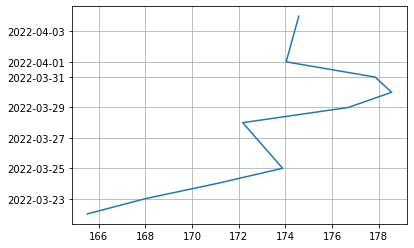

In [52]:

df5 = df4.iloc[::-1].head(10)
plt.plot(df5['Open'], df5['Date'])
plt.grid(True)
plt.show()

### [Kotak Securities]()

Error: Need a bank account in the Kotak Mahindra bank for the api id.



In [111]:
from ks_api_client import ks_api

client = ks_api.KSTradeApi(access_token = "generate and update new access token of production keys", userid = "userlogin id which is same as application owner", consumer_key="consumer key of production keys", ip = "127.0.0.1", app_id = "name of application e.g. DefaultApplication", host = "https://ctradeapi.kotaksecurities.com/apim")

#First initialize session and generate session token

try:
    # Get historical prices
    client.history("historicalprices",{"exchange":"bse","cocode":"476","fromdate":"01-jan-2014","todate":"08-oct-2015"})
except Exception as e:
    print("Exception when calling Historical API->details: %s\n" % e)

ApiException: (401)
Reason: Unauthorized
HTTP response body: {"fault":{"code":900901,"message":"Invalid Credentials","description":"Access failure for API: /apim/session/1.0, version: 1.0 status: (900901) - Invalid Credentials. Make sure you have provided the correct security credentials"}}


### [ALice Blue API]()

1. Historical data API will be available from 5:30 PM (evening) to 8 AM (Next day morning) on weekdays (Monday to Friday). Historical data will not be available during market hours.  
2. Historical data API will be available fully during weekends and holidays.  
3. For NSE segment, 2 years of historical data will be provided.  
4. For NFO, CDS and MCX segments, current expiry data will be provided.  

In [ ]:
from alice_blue import *
session_id = AliceBlue.login_and_get_sessioID(username = "username", password = "password", twoFA= "1993", app_id = "app_id", api_secret = "api_secret")
data = pd.DataFrame(alice.historical_data(alice.get_instrument_by_symbol("NSE"), datetime.datetime.now(), datetime.datetime.now(), HistoricalDataType.Minute))
data.to_csv("NSE.csv", header=False)

### Conclusion
Tested API of Y Finance, Alpha Vantage, Zerodha, Polygon.ai, Alice Blue. Following are the observations:
1. Y Finance providing highest amount of data of different companies with more api requests in a day and data has no missing values. But data has more period breakage.
2. Alpha Vantage providing 23 years of data of every company with less period breakage and no missing values. Api requests is 10 request/10 min.
3. Zerodha is not providing free histortical data.
4. Polygon.ai providing 2 years of data at free with period breakage and no missing values.